<a href="https://colab.research.google.com/github/silverstar0727/1day-1commit-challenge/blob/master/machine_learning_ch5_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 사이킷런을 이용한 LDA

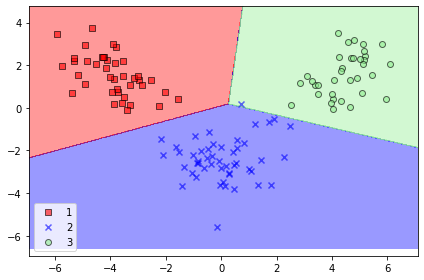

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components = 2)
X_train_lda = lda.fit_transform(X_train_std, y_train)

lr = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
lr = lr.fit(X_train_lda, y_train)
plot_decision_regions(X_train_lda, y_train, classifier = lr)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

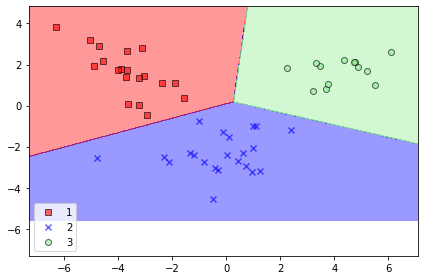

In [0]:
# 규제강도 감소
X_test_lda = lda.transform(X_test_std)
plot_decision_regions(X_test_lda, y_test, classifier = lr)
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.show()

# 커널 PCA를 사용한 비선형 매핑


In [0]:
from scipy.spatial.distance import pdist, squareform
from scipy import exp
from scipy.linalg import eigh
import numpy as np
 
def rbf_kernel_pca(X, gamma, n_components):
  # MxN차원에서 거리의 제곱계산
  sq_dists = pdist(X, 'sqeuclidean')

  #거리를 정방 대칭행렬로 변환
  mat_sq_dists = squareform(sq_dists)

  #커널행렬 계산
  K = exp(-gamma * mat_sq_dists)

  #커널을 중앙으로 조정
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)

  #위의 고윳값과 고유벡터를 구함
  #오름차순으로 반환
  eigvals, eigvecs = eigh(K)
  eigvals, eigvecs = eigvals[::-11], eigvecs[:,::-1]

  # 최상위 벡터 k개를 선택(투영결과)
  X_pc = np.column_stack([eigvecs[:, i] for i in range(n_components)])

  return X_pc

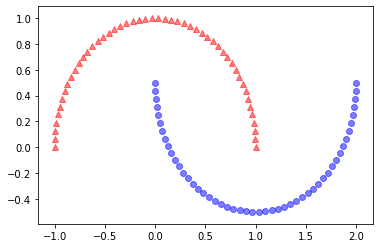

In [0]:
from sklearn.datasets import make_moons

X,y = make_moons(n_samples = 100, random_state = 123)
plt.scatter(X[y == 0, 0], X[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
plt.show()


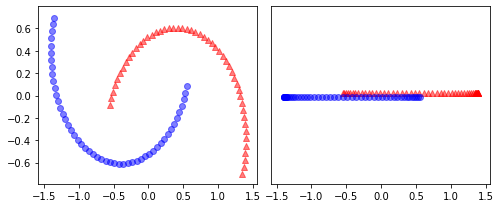

In [0]:
# PCA를 적용했을 경우.
from sklearn.decomposition import PCA
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))

ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0,1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1,1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((50,1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((50,1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


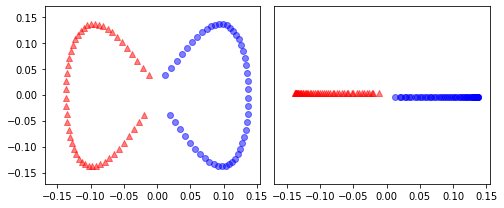

In [0]:
# kernel PCA를 적용했을 경우.
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))
ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^', alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o', alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((50,1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((50,1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

### 동심원 예제

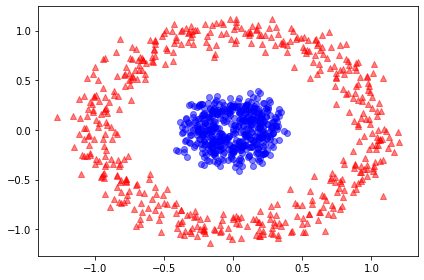

In [0]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples = 1000, random_state = 123, noise = 0.1, factor = 0.2)
plt.scatter(X[y == 0,0], X[y == 0,1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X[y == 1, 0], X[y == 1,1], color = 'blue', marker = 'o', alpha = 0.5)
plt.tight_layout()
plt.show()

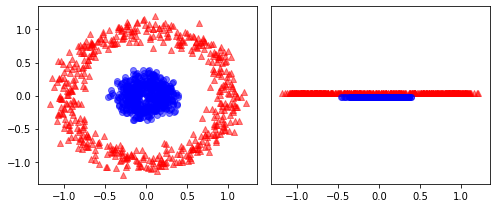

In [0]:
# pca를 이용한 분류
scikit_pca = PCA(n_components = 2)
X_spca = scikit_pca.fit_transform(X)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))
ax[0].scatter(X_spca[y == 0, 0], X_spca[y == 0, 1], color = 'red', marker = '^' ,alpha = 0.5)
ax[0].scatter(X_spca[y == 1, 0], X_spca[y == 1, 1], color = 'blue', marker = 'o' ,alpha = 0.5)
ax[1].scatter(X_spca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_spca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  


ValueError: ignored

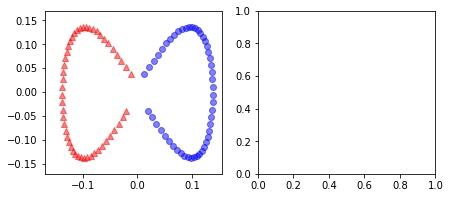

In [0]:
X_kpca = rbf_kernel_pca(X, gamma = 15, n_components = 2)
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (7,3))

ax[0].scatter(X_kpca[y == 0, 0], X_kpca[y == 0, 1], color = 'red', marker = '^' ,alpha = 0.5)
ax[0].scatter(X_kpca[y == 1, 0], X_kpca[y == 1, 1], color = 'blue', marker = 'o' ,alpha = 0.5)
ax[1].scatter(X_kpca[y == 0, 0], np.zeros((500, 1)) + 0.02, color = 'red', marker = '^', alpha = 0.5)
ax[1].scatter(X_kpca[y == 1, 0], np.zeros((500, 1)) - 0.02, color = 'blue', marker = 'o', alpha = 0.5)

ax[1].set_ylim([-1,1])
ax[1].set_yticks([])
plt.tight_layout()
plt.show()

## 사이킷런의 kernel PCA

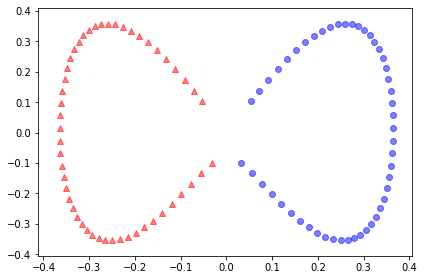

In [0]:
from sklearn.decomposition import KernelPCA

X, y = make_moons(n_samples = 100, random_state = 123)
scikit_kpca = KernelPCA(n_components = 2, kernel = 'rbf', gamma = 15)
X_skernpca = scikit_kpca.fit_transform(X)

plt.scatter(X_skernpca[y == 0, 0], X_skernpca[y == 0,1], color = 'red', marker = '^', alpha = 0.5)
plt.scatter(X_skernpca[y == 1,0], X_skernpca[y == 1,1], color = 'blue', marker = 'o', alpha = 0.5)
plt.tight_layout()
plt.show()